# Analitiche con Pandas - 2. Operazioni avanzate


## [Scarica zip esercizi](../_static/generated/pandas.zip)

[Naviga file online](https://github.com/DavidLeoni/softpython-it/tree/master/pandas)

Vediamo come compiere operazioni più elaborate in pandas, come il raggruppamento con `groupby`, la congiunzione di tabelle con `merge` e infine qualche cenno su come elaborare mappe geografiche con GeoPandas. 

Abbiamo scelto di riunirle in questo foglio perchè tipicamente sono operazioni in cui è più probabile che insorgano problemi e per risolverli sia necessario cercare soluzioni online.

## 1. Raggruppare

**Riferimenti**: 

* [PythonDataScienceHandbook: Aggregation and Grouping](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

Per raggruppare oggetti ed effettuare statistiche su ogni gruppo si può usare il metodo `groupby`. 

Vediamo un esempio di possibile raggruppamento, riprendendo il dataset [astropi.csv](astropi.csv) descritto [nel precedente tutorial](https://it.softpython.org/pandas/pandas1-intro-sol.html):

In [1]:
import pandas as pd  
import numpy as np    

df = pd.read_csv('astropi.csv', encoding='UTF-8')

Supponiamo di voler calcolare quante letture di `humidity` ricadono nell'intervallo definito da ciascun valore intero di umidità `humidity_int`, con l'idea di arrivare ad ottenere un grafico di frequenze come questo (anche se per fare istogrammi ci sono metodi [più rapidi con numpy](https://stackoverflow.com/a/13130357)):

![distribuzione umidità](img/astropi-humidity-histogram.png)

### 1.1 Individuiamo un gruppo

Per farci un idea iniziale, cominciamo intanto a vedere quali righe appartengono per esempio al gruppo `42`, ossia hanno valori di umidità da `42.0` incluso fino a `43.0` escluso. Possiamo usare il [metodo transform](https://it.softpython.org/pandas/pandas1-basics-sol.html#6.5-Trasformare-colonne) adottato in precedenza, notando che al gruppo `42` appartengono `2776` righe:

In [2]:
df[ df['humidity'].transform(int) == 42]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
19222,2016-02-18 16:37:00,33.18,28.96,26.51,42.99,1006.10,1.19,53.23,313.69,9.081925,-32.244905,-35.135448,-0.000581,0.018936,0.014607,0.000563,0.000346,-0.000113,0
19619,2016-02-18 17:43:50,33.34,29.06,26.62,42.91,1006.30,1.50,52.54,194.49,-53.197113,-4.014863,-20.257249,-0.000439,0.018838,0.014526,-0.000259,0.000323,-0.000181,0
19621,2016-02-18 17:44:10,33.38,29.06,26.62,42.98,1006.28,1.01,52.89,195.39,-52.911983,-4.207085,-20.754475,-0.000579,0.018903,0.014580,0.000415,-0.000232,0.000400,0
19655,2016-02-18 17:49:51,33.37,29.07,26.62,42.94,1006.28,0.93,53.21,203.76,-43.124080,-8.181511,-29.151436,-0.000432,0.018919,0.014608,0.000182,0.000341,0.000015,0
19672,2016-02-18 17:52:40,33.33,29.06,26.62,42.93,1006.24,1.34,52.71,206.97,-36.893841,-10.130503,-31.484077,-0.000551,0.018945,0.014794,-0.000378,-0.000013,-0.000101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0


### 1.2 `groupby`

Possiamo generalizzare e associare a ciascun gruppo intero la quantità di righe appartenenti a quel gruppo con il metodo `groupby`. Per prima cosa creiamo una colonna con il valore di umidità intero di ogni gruppo:

In [3]:
df['humidity_int'] = df['humidity'].transform( lambda x: int(x) )

In [4]:
df[ ['time_stamp', 'humidity_int', 'humidity']  ].head()

,time_stamp,humidity_int,humidity
0,2016-02-16 10:44:40,44,44.94
1,2016-02-16 10:44:50,45,45.12
2,2016-02-16 10:45:00,45,45.12
3,2016-02-16 10:45:10,45,45.32
4,2016-02-16 10:45:20,45,45.18


Poi usiamo il metodo `groupby` indicando:

- prima la colonna su cui raggruppare (`'humidity_int'`)
- poi la colonna su cui effettuare la statistica (`'humidity'`)
- infine la statistica da calcolare, in questo caso `.count()` (altre comuni sono `sum()`, `min()`, `max()` e media `mean()`)

In [5]:
df.groupby(['humidity_int'])['humidity'].count()

humidity_int
42     2776
43     2479
44    13029
45    32730
46    35775
47    14176
48     7392
49      297
50      155
51      205
52      209
53      128
54      224
55      164
56      139
57      183
58      237
59      271
60      300
Name: humidity, dtype: int64

Notiamo che il risultato è una `Series`:

In [6]:
risultato = df.groupby(['humidity_int'])['humidity'].count()

In [7]:
type(risultato)

pandas.core.series.Series

Dato che vorremo un grafico a barre personalizzato, per semplicità possiamo usare la funzione nativa `plt.plot` di matplotlib, per il quale ci serviranno una sequenza per le coordinate x e un'altra per le y.

La sequenza per le x è estraibile dall'indice della `Series`:

In [8]:
risultato.index

Int64Index([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
            59, 60],
           dtype='int64', name='humidity_int')

Per la sequenza delle y invece basta usare direttamente la `Series` stessa così:

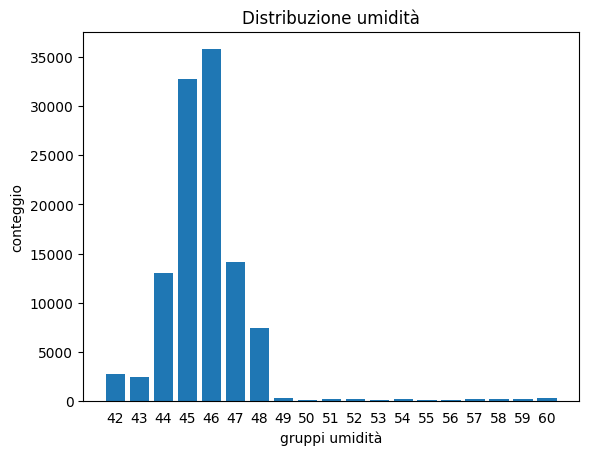

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.bar(risultato.index, risultato)

plt.xlabel('gruppi umidità')
plt.ylabel('conteggio')
plt.title('Distribuzione umidità')

plt.xticks(risultato.index, risultato.index) # mostra le etichette come interi
plt.tick_params(bottom=False)                # rimuove le linette in fondo


plt.show()

### 1.3 Modificare un dataframe con il risultato di un raggruppamento

Nella serie raggruppata abbiamo ottenuto solo 19 righe:

In [10]:
df.groupby(['humidity_int'])['humidity'].count()

humidity_int
42     2776
43     2479
44    13029
45    32730
46    35775
47    14176
48     7392
49      297
50      155
51      205
52      209
53      128
54      224
55      164
56      139
57      183
58      237
59      271
60      300
Name: humidity, dtype: int64

Ma come potremmo riempire tutta la tabella originale, assegnando a ciascuna riga il conteggio del proprio gruppo?

Possiamo usare `transform` così:

In [11]:
df.groupby(['humidity_int'])['humidity'].transform('count')

0         13029
1         32730
2         32730
3         32730
4         32730
          ...  
110864     2776
110865     2776
110866     2776
110867     2776
110868     2776
Name: humidity, Length: 110869, dtype: int64

Come al solito, `group_by` non modifica il dataframe, se vogliamo che il risultato sia salvato nel dataframe dobbiamo assegnare il risultato ad una nuova colonna:

In [12]:
df['Conteggio umidità'] = df.groupby(['humidity_int'])['humidity'].transform('count')

In [13]:
df

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,humidity_int,Conteggio umidità
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,44,13029
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,45,32730
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,45,32730
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,45,32730
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,45,32730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,42,2776
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,42,2776
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,42,2776
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,42,2776



### 1.4 Esercizio - Temperatura media del meteo

✪✪✪ Apri il dataset del [meteo.csv](meteo.csv), che contiene i dati meteo di Trento di novembre 2017 (fonte: https://www.meteotrentino.it). 

**IMPORTANTE**: assegna il dataframe ad una variabile chiamata `meteo` (così evitiamo confusione con il dataframe dell'AstroPi)

Calcola la temperatura media giornaliera per ciascun giorno, e mostrala nel plot, così da avere una coppia di nuove colonne come queste:

```
    Giorno      Temp_media_giorno
01/11/2017      7.983333
01/11/2017      7.983333
01/11/2017      7.983333
    .               .
    .               .
02/11/2017      7.384375
02/11/2017      7.384375
02/11/2017      7.384375
    .               .
    .               .
```


**SUGGERIMENTO 1**: aggiungi la colonna `'Giorno'` estraendo solo il giorno dalla data. Per farlo usa la funzione `.str` applicata a tutta la colonna.

**SUGGERIMENTO 2**: Ci sono vari modi per risolvere il problema: 

- il più efficiente ed elegante è con l'operatore `groupby`, vedere [Pandas trasform - more than meets the eye](https://towardsdatascience.com/pandas-transform-more-than-meets-the-eye-928542b40b56)
- Come alternative, potresti usare un `for` per ciclare i giorni. Tipicamente usare un `for` non è una buona idea con Pandas, perchè con dataset larghi ci può voler molto ad eseguire gli aggiornamenti. Comunque, dato che questo dataset è piccolo a sufficienza, puoi provare ad usare un `for` per ciclare sui giorni e dovresti ottenere i risultati in un tempo ragionevole


In [14]:
# scrivi qui




    *******    SOLUZIONE 1 OUTPUT - ricalcola media per ogni riga - lento !

CON TEMPERATURA MEDIA
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


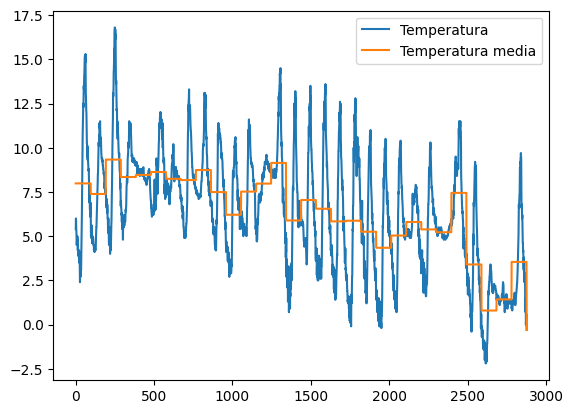

In [15]:
# SOLUZIONE

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Giorno'] = meteo['Data'].str[0:10]


#print("CON GIORNO")
#print(meteo.head())
for giorno in meteo['Giorno']:
    temp_media_giorno = meteo[(meteo.Giorno == giorno)].Temp.values.mean()
    meteo.loc[(meteo.Giorno == giorno),'Temp_media_giorno']= temp_media_giorno

print()
print('    *******    SOLUZIONE 1 OUTPUT - ricalcola media per ogni riga - lento !')
print()
    
print("CON TEMPERATURA MEDIA")
print(meteo.head())
meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Temp_media_giorno.plot(label="Temperatura media", legend=True)
plt.show()


    *******    SOLUZIONE 1 OUTPUT - ricalcola media per ogni riga - lento !

CON TEMPERATURA MEDIA
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


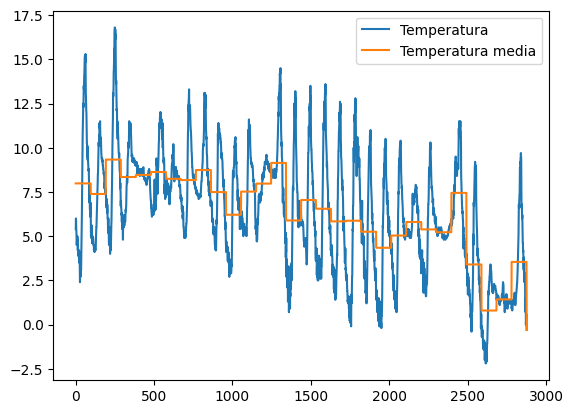



********  OUTPUT SOLUZIONE 2
  ricalcola media solo 30 volte usando un dizionario diz_avg,
  più veloce ma ancora non ottimale
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


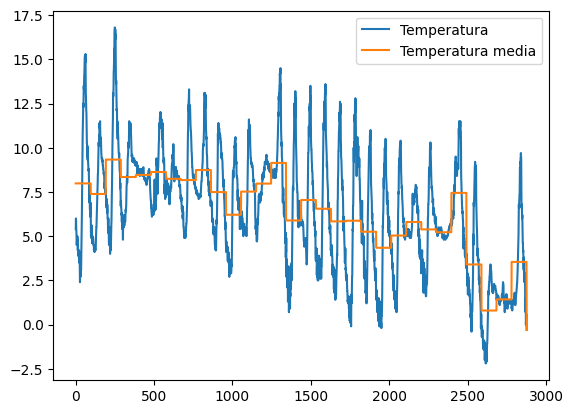

In [16]:
# SOLUZIONE

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Giorno'] = meteo['Data'].str[0:10]
#print()
#print("CON GIORNO")
#print(meteo.head())
diz_medie = {}
for giorno in meteo['Giorno']:
    if giorno not in diz_medie:
        diz_medie[giorno] =  meteo[ meteo['Giorno'] == giorno ]['Temp'].mean()

for giorno in meteo['Giorno']:
    meteo.loc[(meteo.Giorno == giorno),'Temp_media_giorno']= diz_medie[giorno]
    
print()
print()
print('********  OUTPUT SOLUZIONE 2')
print('  ricalcola media solo 30 volte usando un dizionario diz_avg,')
print('  più veloce ma ancora non ottimale')
print(meteo.head())
meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Temp_media_giorno.plot(label="Temperatura media", legend=True)    
plt.show()



********  OUTPUT SOLUZIONE 2
  ricalcola media solo 30 volte usando un dizionario diz_avg,
  più veloce ma ancora non ottimale
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


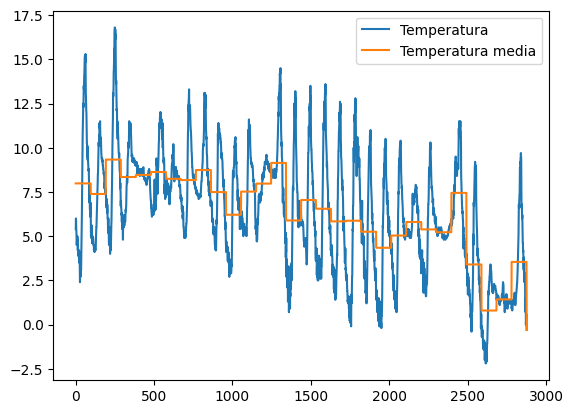


********  OUTPUT SOLUZIONE 3  -  soluzione migliore con groupby e transform 

CON TEMPERATURA MEDIA
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


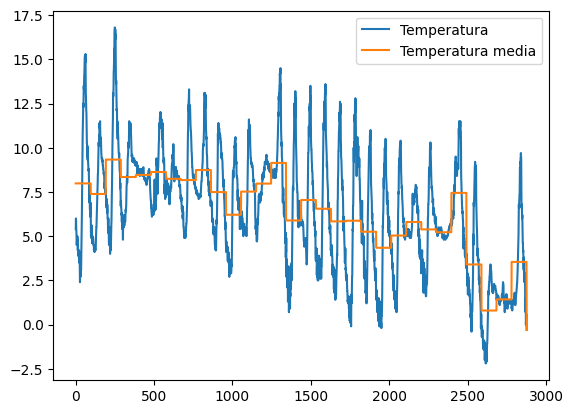

In [17]:
# SOLUZIONE

print()
print('********  OUTPUT SOLUZIONE 3  -  soluzione migliore con groupby e transform ')

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Giorno'] = meteo['Data'].str[0:10]
# .transform è necessaria per evitare di avere una tabella con solo 30 linee
meteo['Temp_media_giorno'] = meteo.groupby('Giorno')['Temp'].transform('mean')

meteo
print()
print("CON TEMPERATURA MEDIA")
print(meteo.head())
meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Temp_media_giorno.plot(label="Temperatura media", legend=True)
plt.show()


********  OUTPUT SOLUZIONE 3  -  soluzione migliore con groupby e transform 

CON TEMPERATURA MEDIA
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


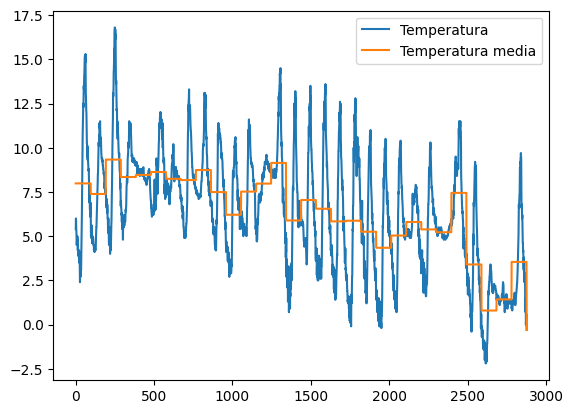

### 1.5 Esercizio - Beni culturali Regione Umbria

Proviamo a fare qualche analisi sui beni culturali della regione Umbria, iniziando con cose semplici e poi passeremo ai raggruppamenti.

#### 1.5.1 Beni culturali - apertura

Apri il dataset [beni-culturali-umbria.csv](beni-culturali-umbria.csv) con pandas (encoding UTF-8) e mostra informazioni sulle colonne

* **ATTENZIONE: usa l'attributo** `delimiter=';'` 
* **IMPORTANTE**: assegna il dataframe alla variabile `beni` così da distinguerlo da altri dataframe

Sorgente dati: [dati.gov.it](https://dati.gov.it/view-dataset/dataset?id=36edd544-412a-4377-b00e-f01782af90cd) - Licenza: Creative Commons Attribution

In [18]:
import pandas as pd   
import numpy as np    

# scrivi qui
beni = pd.read_csv('beni-culturali-umbria.csv', encoding='UTF-8', delimiter=';')
beni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUMERO               105 non-null    int64 
 1   BENEFICIARIO         105 non-null    object
 2   PROGETTO             105 non-null    object
 3   PROGRAMMA_OPERATIVO  105 non-null    object
 4   STATO_ATTUAZIONE     105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [18]:
import pandas as pd   
import numpy as np    

# scrivi qui



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUMERO               105 non-null    int64 
 1   BENEFICIARIO         105 non-null    object
 2   PROGETTO             105 non-null    object
 3   PROGRAMMA_OPERATIVO  105 non-null    object
 4   STATO_ATTUAZIONE     105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [19]:
beni

,NUMERO,BENEFICIARIO,PROGETTO,PROGRAMMA_OPERATIVO,STATO_ATTUAZIONE
0,1,Comune di Acquasparta,"Progetto per il recupero, il restauro e la tra...",POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
1,2,Comune di Acquasparta,"Recupero, restauro e trasformazione in centro ...",PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
2,3,Comune di Acquasparta,Riqualificazione e valorizzazione Palazzo Cesi,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
3,4,Comune di Acquasparta,Completamento Palazzo Cesi. Riqualificazione d...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
4,5,Comune di Acquasparta,Completamento delle opere di restauro e valori...,POR FESR 2014 - 2020 Azione 5.2.1,IN CORSO DI REALIZZAZIONE
...,...,...,...,...,...
100,101,Comune di Umbertide,Lavori di completamento del Centro Socio Cultu...,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
101,102,Regione Umbria,Recupero e consolidamento della Cinta muraria ...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
102,103,Azienda pubblica 'Veralli Cortesi',Valorizzazione arte contemporanea. Lavori di c...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
103,104,Sodalizio S. Martino Perugia,FUSEUM Museo Brajo Fuso: completamento,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO


#### 1.5.2 Beni culturali - stato progetti 

Dato il dizionario `query` con `comune` e `stato`, trova tutti i progetti ce soddisfino **entrambe** le condizioni

* **NON** scrivere `Acquasparta` o `REALIZZATO` nel codice ! 

In [20]:
query = {'comune' : 'Acquasparta',
         'stato'  : 'REALIZZATO'
        }
#query = {'comune' : 'Spoleto', 'stato' : 'IN CORSO DI REALIZZAZIONE' }

# scrivi qui
beni[(beni['STATO_ATTUAZIONE'] == query['stato']) & beni['BENEFICIARIO'].str.contains(query['comune'])]

,NUMERO,BENEFICIARIO,PROGETTO,PROGRAMMA_OPERATIVO,STATO_ATTUAZIONE
0,1,Comune di Acquasparta,"Progetto per il recupero, il restauro e la tra...",POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
1,2,Comune di Acquasparta,"Recupero, restauro e trasformazione in centro ...",PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
2,3,Comune di Acquasparta,Riqualificazione e valorizzazione Palazzo Cesi,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
3,4,Comune di Acquasparta,Completamento Palazzo Cesi. Riqualificazione d...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO


In [20]:
query = {'comune' : 'Acquasparta',
         'stato'  : 'REALIZZATO'
        }
#query = {'comune' : 'Spoleto', 'stato' : 'IN CORSO DI REALIZZAZIONE' }

# scrivi qui



,NUMERO,BENEFICIARIO,PROGETTO,PROGRAMMA_OPERATIVO,STATO_ATTUAZIONE
0,1,Comune di Acquasparta,"Progetto per il recupero, il restauro e la tra...",POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
1,2,Comune di Acquasparta,"Recupero, restauro e trasformazione in centro ...",PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
2,3,Comune di Acquasparta,Riqualificazione e valorizzazione Palazzo Cesi,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
3,4,Comune di Acquasparta,Completamento Palazzo Cesi. Riqualificazione d...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO


#### 1.5.3 Beni culturali -  riqualificazione

Trova tutti i progetti che prevedono riqualificazione

**ATTENZIONE** alle diverse capitalizzazioni! In tutto dovresti trovare 17 risultati

In [21]:
# scrivi qui
beni[beni['PROGETTO'].str.contains('riqualificazione') | beni['PROGETTO'].str.contains('Riqualificazione')]

,NUMERO,BENEFICIARIO,PROGETTO,PROGRAMMA_OPERATIVO,STATO_ATTUAZIONE
2,3,Comune di Acquasparta,Riqualificazione e valorizzazione Palazzo Cesi,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
3,4,Comune di Acquasparta,Completamento Palazzo Cesi. Riqualificazione d...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
8,9,Comune di Assisi,Riqualificazione e adegaumento IAT Area Vasta,APQ Beni culturali II Atto integrativo,REALIZZATO
9,10,Comune di Assisi,Valorizzazione degli spazi espositivi di Palaz...,POR FESR 2014 - 2020 Azione 5.2.1,IN CORSO DI REALIZZAZIONE
10,11,Comune di Bastia Umbra,Riqualificazione sito archeologico Via Renzini,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
15,16,Comune di Cascia,Riqualificazione e adeguamento IAT Area Vasta,APQ Beni culturali II Atto integrativo,REALIZZATO
32,33,Comune di Foligno,Riqualificazione e adegaumento IAT Area Vasta,APQ Beni culturali II Atto integrativo,REALIZZATO
34,35,Comune di Giano dell’Umbria,Sistema bibliotecario – documentario. Ristrutt...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
39,40,Comune di Gubbio,Valorizzazione e riqualificazione del compless...,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
46,47,Comune di Montecastello di Vibio,Lavori di riqualificazione ed adeguamento impi...,PAR FSC 2007 - 2013 Azione 3.5.2a,IN CORSO DI REALIZZAZIONE


In [21]:
# scrivi qui



,NUMERO,BENEFICIARIO,PROGETTO,PROGRAMMA_OPERATIVO,STATO_ATTUAZIONE
2,3,Comune di Acquasparta,Riqualificazione e valorizzazione Palazzo Cesi,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
3,4,Comune di Acquasparta,Completamento Palazzo Cesi. Riqualificazione d...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
8,9,Comune di Assisi,Riqualificazione e adegaumento IAT Area Vasta,APQ Beni culturali II Atto integrativo,REALIZZATO
9,10,Comune di Assisi,Valorizzazione degli spazi espositivi di Palaz...,POR FESR 2014 - 2020 Azione 5.2.1,IN CORSO DI REALIZZAZIONE
10,11,Comune di Bastia Umbra,Riqualificazione sito archeologico Via Renzini,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
15,16,Comune di Cascia,Riqualificazione e adeguamento IAT Area Vasta,APQ Beni culturali II Atto integrativo,REALIZZATO
32,33,Comune di Foligno,Riqualificazione e adegaumento IAT Area Vasta,APQ Beni culturali II Atto integrativo,REALIZZATO
34,35,Comune di Giano dell’Umbria,Sistema bibliotecario – documentario. Ristrutt...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
39,40,Comune di Gubbio,Valorizzazione e riqualificazione del compless...,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
46,47,Comune di Montecastello di Vibio,Lavori di riqualificazione ed adeguamento impi...,PAR FSC 2007 - 2013 Azione 3.5.2a,IN CORSO DI REALIZZAZIONE


#### 1.5.4 Beni culturali - estremi

Trovare tutti i progetti aventi NUMERO incluso tra i limiti indicati nella variabile `estremi` (inclusi)

* **NON** scrivere `10` o `18` nel codice!

In [22]:
estremi = (10,18)
#estremi = (15,21)

# scrivi qui

beni[(beni['NUMERO'] >= estremi[0]) & (beni['NUMERO'] <= estremi[1])]

,NUMERO,BENEFICIARIO,PROGETTO,PROGRAMMA_OPERATIVO,STATO_ATTUAZIONE
9,10,Comune di Assisi,Valorizzazione degli spazi espositivi di Palaz...,POR FESR 2014 - 2020 Azione 5.2.1,IN CORSO DI REALIZZAZIONE
10,11,Comune di Bastia Umbra,Riqualificazione sito archeologico Via Renzini,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
11,12,Comune di Bettona,Sistema museale di Bettona - Compeltamento del...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
12,13,Comune di Bettona,Lavori di movimentazione e restauro del porton...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
13,14,Comune di Bevagna,Completamento Palazzo della Cultura - Allestim...,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
14,15,Comune di Campello sul Clitunno,Valorizzazione del centro storico del Castello...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
15,16,Comune di Cascia,Riqualificazione e adeguamento IAT Area Vasta,APQ Beni culturali II Atto integrativo,REALIZZATO
16,17,Comune di Cascia,Realizzazione dei servizi innovativi per la va...,Programma Parallelo al POR FESR 2007 -2013,REALIZZATO
17,18,Comune di Cascia,Polo museale Santa Margherita. Completamento,PAR FSC 2007 - 2013 Azione 3.5.2a,IN CORSO DI REALIZZAZIONE


In [22]:
estremi = (10,18)
#estremi = (15,21)

# scrivi qui



,NUMERO,BENEFICIARIO,PROGETTO,PROGRAMMA_OPERATIVO,STATO_ATTUAZIONE
9,10,Comune di Assisi,Valorizzazione degli spazi espositivi di Palaz...,POR FESR 2014 - 2020 Azione 5.2.1,IN CORSO DI REALIZZAZIONE
10,11,Comune di Bastia Umbra,Riqualificazione sito archeologico Via Renzini,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
11,12,Comune di Bettona,Sistema museale di Bettona - Compeltamento del...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
12,13,Comune di Bettona,Lavori di movimentazione e restauro del porton...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
13,14,Comune di Bevagna,Completamento Palazzo della Cultura - Allestim...,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO
14,15,Comune di Campello sul Clitunno,Valorizzazione del centro storico del Castello...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO
15,16,Comune di Cascia,Riqualificazione e adeguamento IAT Area Vasta,APQ Beni culturali II Atto integrativo,REALIZZATO
16,17,Comune di Cascia,Realizzazione dei servizi innovativi per la va...,Programma Parallelo al POR FESR 2007 -2013,REALIZZATO
17,18,Comune di Cascia,Polo museale Santa Margherita. Completamento,PAR FSC 2007 - 2013 Azione 3.5.2a,IN CORSO DI REALIZZAZIONE


#### 1.5.5 Beni culturali - Stato attuazione PAR 

Selezionare solo i progetti operativi PAR (che quindi hanno PAR in PROGETTO_OPERATIVO) e mostrarne il conteggio dello stato d'attuazione

In [23]:
# scrivi qui
abeni = beni[beni['PROGRAMMA_OPERATIVO'].str.contains('PAR')]
abeni.groupby(['STATO_ATTUAZIONE'])['STATO_ATTUAZIONE'].count()

STATO_ATTUAZIONE
IN CORSO DI REALIZZAZIONE    12
REALIZZATO                   36
Name: STATO_ATTUAZIONE, dtype: int64

In [23]:
# scrivi qui



STATO_ATTUAZIONE
IN CORSO DI REALIZZAZIONE    12
REALIZZATO                   36
Name: STATO_ATTUAZIONE, dtype: int64

#### 1.5.6 Beni culturali - progetti a Todi

Mostrare il conteggio dei progetti realizzati a Todi

In [24]:
# scrivi qui
tbeni = beni[beni['BENEFICIARIO'] == 'Comune di Todi']
tbeni.groupby(['BENEFICIARIO','STATO_ATTUAZIONE'])['STATO_ATTUAZIONE'].count()

BENEFICIARIO    STATO_ATTUAZIONE         
Comune di Todi  IN CORSO DI REALIZZAZIONE    4
                REALIZZATO                   2
Name: STATO_ATTUAZIONE, dtype: int64

In [24]:
# scrivi qui



BENEFICIARIO    STATO_ATTUAZIONE         
Comune di Todi  IN CORSO DI REALIZZAZIONE    4
                REALIZZATO                   2
Name: STATO_ATTUAZIONE, dtype: int64

#### 1.5.7 Beni culturali - Comuni beneficiari

Trovare i comuni beneficiari togliendo il prefisso 'Comune di', e senza duplicati

- **NON** usare cicli `for` o list comprehension
- **SUGGERIMENTO**: usare [pd.unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

In [25]:
# scrivi qui
cbeni = beni[beni['BENEFICIARIO'].str.contains('Comune')]

pd.unique(cbeni['BENEFICIARIO'].str[10:].str.strip())

array(['Acquasparta', 'Amelia', 'Assisi', 'Bastia Umbra', 'Bettona',
       'Bevagna', 'Campello sul Clitunno', 'Cascia', 'Castel Viscardo',
       'Città della Pieve', 'Città di Castello', 'Corciano', 'Deruta',
       'Ferentillo', 'Foligno', 'Fratta Todina', 'Giano dell’Umbria',
       'Gualdo Tadino', 'Guardea', 'Gubbio', 'Marsciano',
       'Montecastello di Vibio', 'Montecchio', 'Montefalco', 'Narni',
       'Nocera Umbra', 'Orvieto', 'Otricoli', 'Panicale', 'Parrano',
       'Perugia', 'Piegaro', 'Polino', 'Preci', "Sant'Anatolia di Narco",
       'Sellano', 'Spello', 'Spoleto', 'Terni', 'Todi', 'Torgiano',
       'Trevi', 'Tuoro sul Trasimeno', 'Umbertide'], dtype=object)

In [25]:
# scrivi qui



array(['Acquasparta', 'Amelia', 'Assisi', 'Bastia Umbra', 'Bettona',
       'Bevagna', 'Campello sul Clitunno', 'Cascia', 'Castel Viscardo',
       'Città della Pieve', 'Città di Castello', 'Corciano', 'Deruta',
       'Ferentillo', 'Foligno', 'Fratta Todina', 'Giano dell’Umbria',
       'Gualdo Tadino', 'Guardea', 'Gubbio', 'Marsciano',
       'Montecastello di Vibio', 'Montecchio', 'Montefalco', 'Narni',
       'Nocera Umbra', 'Orvieto', 'Otricoli', 'Panicale', 'Parrano',
       'Perugia', 'Piegaro', 'Polino', 'Preci', "Sant'Anatolia di Narco",
       'Sellano', 'Spello', 'Spoleto', 'Terni', 'Todi', 'Torgiano',
       'Trevi', 'Tuoro sul Trasimeno', 'Umbertide'], dtype=object)

#### 1.5.8 Beni culturali - programma operativo

Creare una nuova colonna `sigla` con i primi 3 caratteri della colonna `PROGRAMMA_OPERATIVO`. 

- se la prima parola è maggiore di 3 caratteri, impostare stringa vuota
- **SUGGERIMENTO**: servirà una `transform` con funzione

In [26]:
# scrivi qui
def trasf(stringa):
    candidato = stringa.split()[0]
    if len(candidato) == 3:
        return candidato
    else:
        return ''
    
beni['sigla'] = beni['PROGRAMMA_OPERATIVO'].transform(trasf)

In [26]:
# scrivi qui



In [27]:
beni[:18]  # nota la riga 16

,NUMERO,BENEFICIARIO,PROGETTO,PROGRAMMA_OPERATIVO,STATO_ATTUAZIONE,sigla
0,1,Comune di Acquasparta,"Progetto per il recupero, il restauro e la tra...",POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO,POR
1,2,Comune di Acquasparta,"Recupero, restauro e trasformazione in centro ...",PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO,PAR
2,3,Comune di Acquasparta,Riqualificazione e valorizzazione Palazzo Cesi,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO,PAR
3,4,Comune di Acquasparta,Completamento Palazzo Cesi. Riqualificazione d...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO,PAR
4,5,Comune di Acquasparta,Completamento delle opere di restauro e valori...,POR FESR 2014 - 2020 Azione 5.2.1,IN CORSO DI REALIZZAZIONE,POR
5,6,Comune di Amelia,Sistema bibliotecario – documentario. Risaname...,PAR FSC 2007 - 2013 Azione 3.5.2a,REALIZZATO,PAR
6,7,Comune di Assisi,Allestimento di Palazzo Monte Frumentario fina...,POR FESR 2007 -2013 Attività 2.2.2,REALIZZATO,POR
7,8,Comune di Assisi,Valorizzazione degli spazi espositivi di Palaz...,PAR FSC 2007 - 2013 Azione 3.5.2a,IN CORSO DI REALIZZAZIONE,PAR
8,9,Comune di Assisi,Riqualificazione e adegaumento IAT Area Vasta,APQ Beni culturali II Atto integrativo,REALIZZATO,APQ
9,10,Comune di Assisi,Valorizzazione degli spazi espositivi di Palaz...,POR FESR 2014 - 2020 Azione 5.2.1,IN CORSO DI REALIZZAZIONE,POR


## 2. Congiungere tabelle

Supponi di voler aggiungere una colonna con la posizione geografica della International Space Station (ISS). Per farlo, avresti bisogno di unire il nostro dataset con un altro che contenga questa informazione. Prendiamo per esempio il dataset [iss-coords.csv](iss-coords.csv)

In [28]:
iss_coords = pd.read_csv('iss-coords.csv', encoding='UTF-8')

In [29]:
iss_coords

,timestamp,lat,lon
0,2016-01-01 05:11:30,-45.103458,14.083858
1,2016-01-01 06:49:59,-37.597242,28.931170
2,2016-01-01 11:52:30,17.126141,77.535602
3,2016-01-01 11:52:30,17.126464,77.535861
4,2016-01-01 14:54:08,7.259561,70.001561
...,...,...,...
333,2016-02-29 13:23:17,-51.077590,-31.093987
334,2016-02-29 13:44:13,30.688553,-135.403820
335,2016-02-29 13:44:13,30.688295,-135.403533
336,2016-02-29 18:44:57,27.608774,-130.198781


Notiamo che c'è una colonna `timestamp`, che sfortunatamente ha un nome leggermente diverse dalla colonna `time_stamp` (nota l'underscore `_`) nel dataset original astropi:

In [30]:
df = pd.read_csv('astropi.csv', encoding='UTF-8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time_stamp  110869 non-null  object 
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
dtypes:

Per fondere i dataset in base a due colonne, possiamo usare il comando `merge` così: 

In [31]:
# ricorda che merge produce un NUOVO dataframe:

df = pd.read_csv('astropi.csv', encoding='UTF-8')

geo_astropi = df.merge(iss_coords, left_on='time_stamp', right_on='timestamp')

# merge aggiunge sia la colonna time_stamp che timestamp,
# perciò rimuoviamo la colonna duplicata 'timestamp'

geo_astropi = geo_astropi.drop('timestamp', axis=1)

In [32]:
geo_astropi

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,lat,lon
0,2016-02-19 03:49:00,32.53,28.37,25.89,45.31,1006.04,1.31,51.63,34.91,21.125001,...,-14.474195,-0.000667,0.018851,0.014607,0.000060,-0.000304,0.000046,0,31.434741,52.917464
1,2016-02-19 14:30:40,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,-7.290281,-0.000563,0.018687,0.014502,0.000208,-0.000499,0.000034,0,-46.620658,-57.311657
2,2016-02-19 14:30:40,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,-7.290281,-0.000563,0.018687,0.014502,0.000208,-0.000499,0.000034,0,-46.620477,-57.311138
3,2016-02-21 22:14:11,32.21,28.05,25.50,47.36,1012.41,0.67,52.40,27.57,15.441683,...,2.230845,-0.000584,0.018800,0.014136,-0.000015,-0.000159,0.000221,0,19.138359,-140.211489
4,2016-02-23 23:40:50,32.32,28.18,25.61,47.45,1010.62,1.14,51.41,33.68,11.994554,...,1.171099,-0.000659,0.018276,0.014124,0.000368,0.000368,0.000030,0,4.713819,80.261665
5,2016-02-24 10:05:51,32.39,28.26,25.70,46.83,1010.51,0.61,51.91,287.86,6.554283,...,-15.700529,-0.000647,0.018352,0.014344,-0.000664,-0.000518,0.000171,0,-46.061583,22.246025
6,2016-02-25 00:23:01,32.38,28.18,25.62,46.52,1008.28,0.90,51.77,30.80,9.947132,...,-1.494121,-0.000663,0.018502,0.014366,0.000290,0.000314,-0.000375,0,47.047346,137.958918
7,2016-02-27 01:43:10,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,-4.886117,-0.000624,0.017930,0.014378,-0.000026,-0.000013,-0.000047,0,-41.049112,30.193004
8,2016-02-27 01:43:10,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,-4.886117,-0.000624,0.017930,0.014378,-0.000026,-0.000013,-0.000047,0,-8.402991,-100.981726
9,2016-02-28 09:48:40,32.62,28.62,26.02,45.15,1006.06,1.12,50.44,301.74,10.348327,...,-13.590825,-0.000590,0.017620,0.014725,-0.000358,-0.000301,-0.000061,0,50.047523,175.566751


### 2.2 Esercizio - migliorare merge

Se noti, la tabella sopra ha le colonne `lat` e `lon`, ma pochissime righe. Perchè? Prova a fondere le tabelle in qualche modo utile in modo da avere tutte le righe originali e tutte le celle di `lat` e `lon` riempite.

- Per altre strategie di merge, leggi l'attributo `how` [Why And How To Use Merge With Pandas in Python](https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738)
- Per riempire valori mancanti non usare tecniche di interpolazione, semplicemente metti la posizione della stazione in quel dato giorno o ora.

In [33]:
# scrivi qui

df = pd.read_csv('astropi.csv', encoding='UTF-8')

geo_astropi = df.merge(iss_coords, left_on='time_stamp', right_on='timestamp', how='left')

pd.merge_ordered(df, iss_coords, fill_method='ffill', how='left', left_on='time_stamp', right_on='timestamp')
geo_astropi

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,timestamp,lat,lon
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,NaN,NaN,NaN
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,NaN,NaN,NaN
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,NaN,NaN,NaN
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,NaN,NaN,NaN
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110866,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,NaN,NaN,NaN
110867,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,NaN,NaN,NaN
110868,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,NaN,NaN,NaN
110869,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,NaN,NaN,NaN


In [33]:
# scrivi qui



,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,timestamp,lat,lon
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,NaN,NaN,NaN
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,NaN,NaN,NaN
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,NaN,NaN,NaN
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,NaN,NaN,NaN
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110866,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,NaN,NaN,NaN
110867,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,NaN,NaN,NaN
110868,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,NaN,NaN,NaN
110869,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,NaN,NaN,NaN


## 3. GeoPandas


<div class="alert alert-warning">

**ATTENZIONE: Questa parte del tutorial è SPERIMENTALE, mancano commenti**
    
Per qualche bel tutorial completo online, raccomandiamo il materiale (in inglese) dal sito [Geospatial Analysis and Representation for Data Science](https://napo.github.io/geospatial_course_unitn/) del relativo corso tenuto da Maurizio Napolitano (FBK) al master in Data Science all'Università di Trento.  

</div>

Pandas è anche molto comodo per gestire dati geografici, con l'estensione [GeoPandas](http://geopandas.org/)

Installiamola subito:

Anaconda:

`conda install geopandas`

e poi

`conda install -c conda-forge descartes`

Linux/Mac (`--user` installa nella propria home):


- ``` python3 -m pip install --user geopandas descartes ```

### 3.1 Un esempio semplice con GeoPandas

Faremo un esempio mostrando regioni italiane colorate in base alla popolazione residente:   

![](italy-population.png)

Quando si parla di mappe, tipicamente vogliamo mostrare delle regioni o nazioni colorate in base ad un valore associato ad ogni zona. Quindi servono sempre almeno due cose:

1. le forme geometriche delle zone da raffigurare
2. i valori da associare ad ogni zona da far corrispondere alle gradazioni di colore

Tipicamente questi dati vengono presi da almeno due dataset diversi, uno geografico e uno di statistiche, ma vi troverete spesso con il problema che nel dataset geografico le zone vengono chiamate con un nome o codice diverso da quello del dataset con le statistiche. 

Divideremo l'esempio in due parti: 

* nella prima, useremo tabelle già ripulite che trovate nella stessa cartella di questo foglio. Questo ci permetterà di comprendere i meccanismi di base di GeoPandas e del _fuzzy matching_

* nella seconda parte, proporremo di risolvere un esercizio completo che prevede lo scaricamento online del file html e pulizia 

Vediamo il nostro esempio, in cui le zone geografiche vengono prese dal sito dell'istat da file geografici in formato shapefile. Il file è già salvato nella cartella qui: [reg2011/reg2011_g.shp](reg2011/reg2011_g.shp) , se volete vedere dove era online guardate basi territoriali qua: https://www.istat.it/it/archivio/104317

### 3.2 Leggere shapefiles in GeoPandas

Leggiamo con geopandas lo shapefile:

In [34]:
import geopandas as gpd

df_regioni = gpd.read_file(filename="reg2011/reg2011_g.shp")
df_regioni.head()  

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,PIEMONTE,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,VALLE D'AOSTA/VALLÉE D'AOSTE\r\nVALLE D'AOSTA/...,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,LOMBARDIA,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,TRENTINO-ALTO ADIGE/SUDTIROL,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,VENETO,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."


Oltre alla solita tabella di Pandas, notiamo che tra le colonne ci sono dei codice `COD_REG` per identificare le regioni, i loro nomi `NOME_REG` e la geometria `geometry`. Chiamando `plot()` sul dataframe di geopandas possiamo vedere la cartina risultante:

<AxesSubplot:>

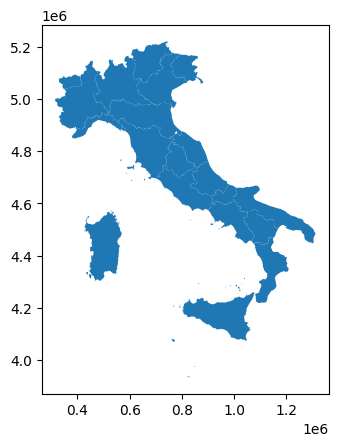

In [35]:
%matplotlib inline
df_regioni.plot()


### 3.3 Prendiamo statistiche da visualizzare


Nel nostro esempio, estraiamo statistiche sulla popolazione delle regioni italiane da una pagina HTML. Metteremo poi i dati estratti in un dataframe Pandas (non GeoPandas) chiamato `df_popolazione`. Per comodità abbiamo salvato tale pagina nel file [popolazione.html](popolazione.html) (se volete vedere la versione online, andate su questo sito: https://www.tuttitalia.it/regioni/popolazione)

<div class="alert alert-warning">

**ATTENZIONE**: Per il momento puoi ignorare il codice che segue, ci serve solo per caricare i dati nel dataframe `df_popolazione`

</div>

In [36]:
import pandas as pd


# prende la riga di una tabella html, e ritorna un dizionario con i dati estratti
def estrai_dizionario(riga_html):
    colonne = riga_html.select('td')
    return dict(name=colonne[1].text,
                population=colonne[2].text.replace('.', '').replace(',', '.'),
                area=colonne[3].text.replace('.', '').replace(',', '.'))

# Estrae la popolazione per regione da popolazione.html, e restituisce un dataframe Pandas (non GeoPandas)
def estrai_popolazione():
    from bs4 import BeautifulSoup
    with open('popolazione.html', encoding='utf-8') as f:
        testo = f.read()        
        listona = []    # listona di dizionari, ogni dizionario rappresenta una riga
        # usiamo il parser html5lib invece di lxml perchè il sito è complesso 
        soup = BeautifulSoup(testo, 'html5lib')  
        righe_html = soup.select('table.ut tr')[1:21]
        for riga_html in righe_html:
            listona.append(estrai_dizionario(riga_html))
        return pd.DataFrame(listona)


Vediamo qui il contenuto del file: 

In [37]:
df_popolazione = estrai_popolazione()
df_popolazione 

,name,population,area
0,Lombardia,10019166,23863.65
1,Lazio,5898124,17232.29
2,Campania,5839084,13670.95
3,Sicilia,5056641,25832.39
4,Veneto,4906210,18345.35
5,Em.-Romagna,4448841,22452.78
6,Piemonte,4392526,25387.07
7,Puglia,4063888,19540.90
8,Toscana,3742437,22987.04
9,Calabria,1965128,15221.90


Se compariamo i nomi in questa tabella con il dataframe della prima, notiamo subito che parecchi nomi non sono identici. Per esempio, nello shapefile troviamo `TRENTINO-ALTO ADIGE/SUDTIROL` mentre nelle statistiche c'è `Trentino-AA`. Volendo creare una tabella unica, occorrerà quindi fare integrazione dati cercando di ottenere un _matching_ tra le righe dei due dataset. Per venti regioni potremmo farla a mano ma chiaramente farlo per migliaia di righe sarebbe estremamente oneroso. Per agevolare questa operazione, ci conviene eseguire una cosiddetta _fuzzy join_, che cerca stringhe simili nei due dataset e in base ad un misura di similarità tra stringhe stabilisce come associare righe della prima tabella a righe della seconda.

Per 

In [38]:

def fuzzy_join(df_geo, df_right, name_left, name_right):
    """ Prende:
         - un data frame di geo pandas df_geo che contiene una colonna chiamata name_left 
         - un'altro dataframe generico df_right che contiene una colonna chiamata name_right
        Ritorna :
        - un nuovo dataframe che è la join dei due dataframe in base alla similirità tra 
          le colonne name_left e name_right
          
          ATTENZIONE: a volte l'agoritmo di similarità può confondersi e considerare uguale due nomi 
                      che invece dovrebbero essere distinti ! 
                      Per quanto possibile, verificare sempre i risultati manualmente.
    """
    from functools import partial
    from itertools import product
    import difflib
    import heapq
    #from pprint import pprint

    df1 = df_geo.set_index(name_left)
    df1.index = df1.index.str.lower()
    df2 = df_right.set_index(name_right)
    df2.index = df2.index.str.lower()


    def get_matcher_smart(dfl, dfr):
        heap = []
        for l, r in product(dfl.index, dfr.index):
            sm = difflib.SequenceMatcher(lambda x: ' .\n\t', l, r)
            heapq.heappush(heap, (1. - sm.quick_ratio(), l, r))
        ass_l, ass_r, ass_map = set(), set(), {}
        while len(ass_map) < len(dfl):
            score, l, r = heapq.heappop(heap)
            if not (l in ass_l or r in ass_r):
                ass_map[l] = r
                ass_l.add(l)
                ass_r.add(r)
        #pprint(ass_map)
        return dfl.index.map(lambda x: ass_map[x])

    df1.index = get_matcher_smart(df1, df2)

    return df1.join(df2)



In [39]:
tabellona = fuzzy_join(df_regioni, df_popolazione, 'NOME_REG', 'name')

tabellona

,COD_REG,SHAPE_Leng,SHAPE_Area,geometry,population,area
NOME_REG,,,,,,
piemonte,1,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",4392526,25387.07
v. d'aosta,2,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5...",126883,3260.90
lombardia,3,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",10019166,23863.65
trentino-aa,4,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5...",1062860,13605.50
veneto,5,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",4906210,18345.35
friuli vg,6,6.674897e+05,7.864294e+09,"MULTIPOLYGON (((852211.994 5080672.916, 852270...",1219191,7924.36
liguria,7,8.342245e+05,5.415465e+09,"MULTIPOLYGON (((400403.625 4851436.938, 400257...",1565307,5416.21
em.-romagna,8,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",4448841,22452.78
toscana,9,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",3742437,22987.04


<AxesSubplot:>

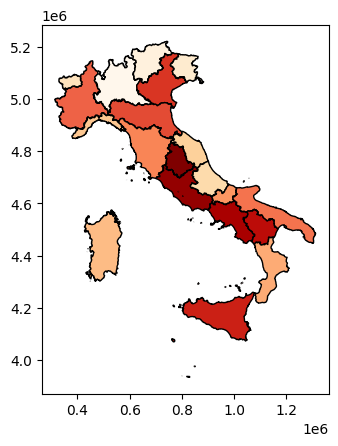

In [40]:
tabellona.plot(column='population', cmap='OrRd', edgecolor='k', legend=False)


### 3.4 Esempio di integrazione


<div class="alert alert-warning">


**ATTENZIONE: QUESTA PARTE E' INCOMPLETA**
</div>

Vediamo l'esempio di integrazione completo. Ti serviranno anche `requests`, `beautifulsoup4`, e `html5lib`. Installali così:


Anaconda:

- `conda install requests beautifulsoup4 html5lib`

Linux/Mac (`--user` installa nella propria home):


- ``` python3 -m pip install --user requests beautifulsoup4 html5lib ```


Per fare un esempio di integrazione, useremo una pagina HTML con i dati delle regioni italiane:

* https://www.tuttitalia.it/regioni/popolazione/

Per capire come estrarre la popoloziona dall'HTML, guarda il tutorial sull'[estrazione](https://it.softpython.org/extraction/extraction-sol.html)


Nel menu basi territoriali qua invece abbiamo dei file geografici in formato shapefile delle regioni: 

* basi territoriali https://www.istat.it/it/archivio/104317



In [41]:
# Scarica la pagina HTML della popolazione, e la salva nel file 'popolazione.html'
def scarica_popolazione():
    from bs4 import BeautifulSoup
    import requests

    r = requests.get("https://www.tuttitalia.it/regioni/popolazione/")
    if r.status_code == 200:
        testo = r.text
        with open('popolazione.html', 'w', encoding='utf-8') as f:
            f.write(testo)
            print("Ho salvato il file 'popolazione.html'")
    else:
        # se il codice non è 200, qualcosa è probabilmente andato storto
        # e blocchiamo l'esecuzione dello script        
        raise Exception('Errore durante lo scaricamento : %s' % r)     

# scarica_popolazione()